<a href="https://colab.research.google.com/github/YousraAshour/Unsupervised_machine_Learning/blob/main/Agriculture_Seeds_Crops_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np 
import pandas as pd 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [43]:
df = pd.read_csv('/content/train.csv')


In [44]:
train= df.drop(columns=['y','ID'])
train.shape

(10834, 16)

In [45]:
train.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [46]:
train.dropna(inplace=True)
train.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64

In [47]:
train.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.4 MB


In [73]:
ss=StandardScaler()
train=ss.fit_transform(train)
train.shape

(10834, 16)

In [72]:
pca=PCA(10)
pca.fit(train)
train_pca= pca.transform(train)
train_pca.shape

(10834, 10)

# KMeans without PCA

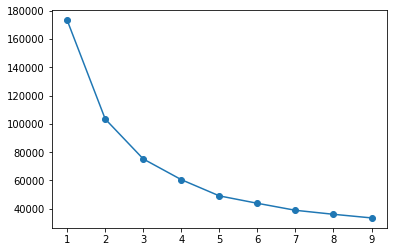

In [74]:
dists=[]
for i in range (1,10):

    k=KMeans(n_clusters=i,max_iter=300, tol=0.0001).fit(train)
    dist= k.inertia_
    dists.append(dist)
plt.plot(range(1,10),dists, marker='o')

score 0.40425480089590743


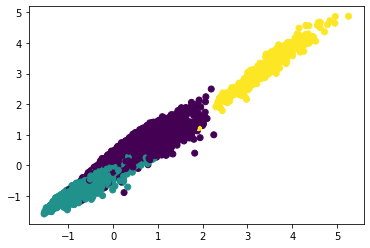

In [86]:
k=KMeans(n_clusters=3,max_iter=300, tol=0.0001).fit(train)

labels=k.labels_
score= silhouette_score(train,labels)
print('score',score)

plt.scatter(train[:,1],train[:,2], c=labels)

# KMeans with PCA

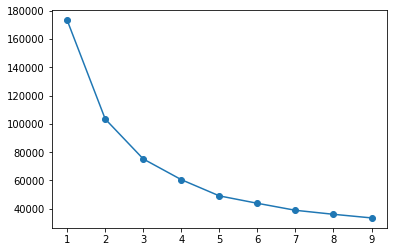

In [76]:
dists=[]
for i in range (1,10):

    k=KMeans(n_clusters=i,max_iter=300, tol=0.0001).fit(train_pca)
    dist= k.inertia_
    dists.append(dist)
plt.plot(range(1,10),dists, marker='o')

score 0.359283672924985


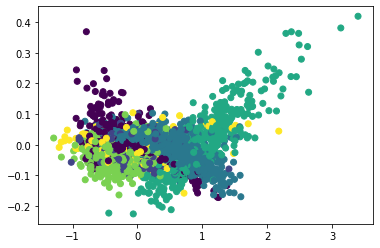

In [83]:
k=KMeans(n_clusters=6,max_iter=300, tol=0.0001).fit(train_pca)

labels=k.labels_
score= silhouette_score(train_pca,labels)
print('score',score)

plt.scatter(train_pca[:,5],train_pca[:,9], c=labels)


## Agglomerative without PCA

score 0.7388915659397451


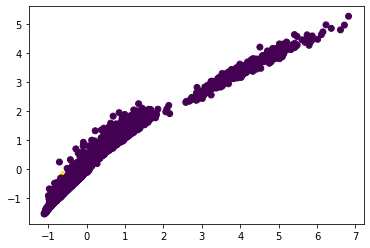

In [93]:
Agg=AgglomerativeClustering(n_clusters=2, linkage='average').fit(train)
labels=Agg.labels_
score= silhouette_score(train,labels)
print('score',score)

plt.scatter(train[:,0],train[:,1], c=labels)

## Agglomerative with PCA
 

score 0.7389026201179142


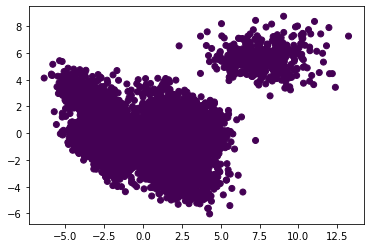

In [98]:
Agg=AgglomerativeClustering(n_clusters=2, linkage='average').fit(train_pca)
labels=Agg.labels_
score= silhouette_score(train_pca,labels)
print('score',score)

plt.scatter(train_pca[:,0],train_pca[:,1], c=labels)

## DBSCAN without PCA

score 0.7388915659397451


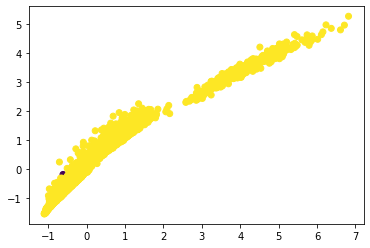

In [114]:
ds=DBSCAN(eps=7,min_samples=100).fit(train)
labels=ds.labels_
score= silhouette_score(train,labels)
print('score',score)

plt.scatter(train[:,0],train[:,1], c=labels)

## DBSCAN with PCA

score 0.7389026201179142


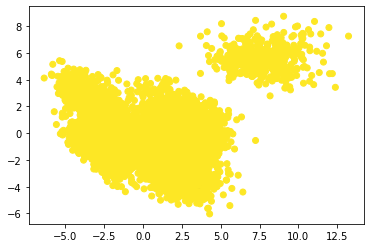

In [115]:
ds=DBSCAN(eps=7,min_samples=100).fit(train_pca)
labels=ds.labels_
score= silhouette_score(train_pca,labels)
print('score',score)

plt.scatter(train_pca[:,0],train_pca[:,1], c=labels)

## GMM without PCA

score 0.402709817676019


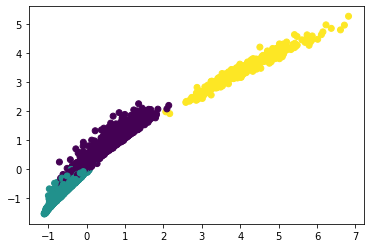

In [122]:
ds=GaussianMixture(n_components=3).fit(train)
labels=ds.predict(train)
score= silhouette_score(train,labels)
print('score',score)

plt.scatter(train[:,0],train[:,1], c=labels.astype(float))

## GMM with PCA

score 0.3294145867733343


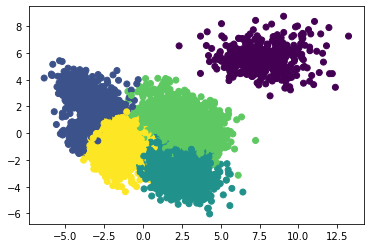

In [132]:
ds=GaussianMixture(n_components=5).fit(train_pca)
labels=ds.predict(train_pca)
score= silhouette_score(train_pca,labels)
print('score',score)

plt.scatter(train_pca[:,0],train_pca[:,1], c=labels.astype(float))

### Conclusion



*   This dataset contained 7 types of dry beans to be classified and it originally has 10000+ samples and 17 features.
*   Clustering methods used above have failed to cluster the correct number of classes exist


*   The silhouette score as a metric didn't seem to be effective in deciding the correct number of clusters as its value would decline after the threshold of 3-4 clusters.
*   For the PCA, it didn't show any effective influence on the clustering methods results but it actually tend to be reducing the silhouette score in most of the cases apart from a slight positive influence in the GMM case.







